# The most perspective markets in programming e-learning

In this project we are working as an analyst for an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc.

Our company has some money to invest in advertisement. We are going to determine two markets that are the most perspective for advertizing

To reach our goal, we could organize surveys for a couple of different markets to find out which would be the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://medium.freecodecamp.org/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969).

[freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run a popular [Medium publication](https://medium.freecodecamp.org/) (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in [this GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

# Exploring data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=0)

In [2]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Columns: 136 entries, Age to YouTubeTheNewBoston
dtypes: float64(105), object(31)
memory usage: 18.9+ MB


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#Show all columns with more than 5 000 not Null values

for i in data.columns:
    if data[i].notna().sum() > 5000:
        print(i, data[i].notna().sum())  

Age 15367
AttendedBootcamp 17709
CityPopulation 15354
CommuteTime 9246
CountryCitizen 15382
CountryLive 15336
EmploymentField 8116
EmploymentStatus 14345
ExpectedEarning 7200
Gender 15454
HasDebt 15291
HasFinancialDependents 15329
HasHighSpdInternet 15380
HasHomeMortgage 6397
HasServedInMilitary 15256
HasStudentDebt 6402
HoursLearning 16714
ID.x 18175
ID.y 15743
Income 7623
IsEthnicMinority 15293
IsReceiveDisabilitiesBenefits 15222
IsSoftwareDev 18068
IsUnderEmployed 9223
JobApplyWhen 8138
JobPref 13483
JobRelocateYesNo 6503
JobRoleInterest 6992
JobWherePref 8118
LanguageAtHome 15344
MaritalStatus 15335
MoneyForLearning 16577
MonthsProgramming 17084
NetworkID 18175
Part1EndTime 18175
Part1StartTime 18175
Part2EndTime 15743
Part2StartTime 15743
ResourceCodecademy 9390
ResourceFCC 13803
ResourceMDN 6417
ResourceSO 11207
ResourceUdemy 5120
ResourceW3S 9765
SchoolDegree 15368
SchoolMajor 8727
YouTubeFCC 6036


# Relevant columns
We've determined the columns we want to analize. These are:
1. **ID** - unique number of a respondent
2. **CountryLive** - a country where he lives
3. **MonthsProgramming** - how long in months a person is learning programming
4. **MoneyForLearning** - how much money a person has already spent on learning
5. **JobRoleInterest** - which programming jobs the person is interested in


In [4]:
relevant_data = data[['ID.x',
                      'CountryLive',
                      'MonthsProgramming',
                      'MoneyForLearning',
                      'JobRoleInterest'
                     ]].copy()
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID.x               18175 non-null  object 
 1   CountryLive        15336 non-null  object 
 2   MonthsProgramming  17084 non-null  float64
 3   MoneyForLearning   16577 non-null  float64
 4   JobRoleInterest    6992 non-null   object 
dtypes: float64(2), object(3)
memory usage: 710.1+ KB


# Dropping rows without job interest
As our goal is to choose 2 markets for advertising, we can't interpret any information when a respondent has no job interests. We simply can't predict which courses to advertise her. So we are going to use only the answers with at least one job interest

In [5]:
relevant_data = relevant_data[relevant_data['JobRoleInterest'].notnull()]
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6992 entries, 1 to 18174
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID.x               6992 non-null   object 
 1   CountryLive        6838 non-null   object 
 2   MonthsProgramming  6633 non-null   float64
 3   MoneyForLearning   6476 non-null   float64
 4   JobRoleInterest    6992 non-null   object 
dtypes: float64(2), object(3)
memory usage: 327.8+ KB


# Dropping rows with nulls
Now we have only a one third from the initial data set, but there are also some Null values. Let's see how dropping all rows with Nulls will affect on the data set

In [6]:
relevant_data.dropna(axis=0, inplace=True)
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6212 entries, 1 to 18171
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID.x               6212 non-null   object 
 1   CountryLive        6212 non-null   object 
 2   MonthsProgramming  6212 non-null   float64
 3   MoneyForLearning   6212 non-null   float64
 4   JobRoleInterest    6212 non-null   object 
dtypes: float64(2), object(3)
memory usage: 291.2+ KB


As it has decreased only by about 10 per cent we can state it's OK to simply drop all rows with nulls

# Renaming columns

In [7]:
relevant_data.rename(columns = {'ID.x': 'id',
                                'CountryLive': 'country',
                                'MonthsProgramming': 'months_programming',
                                'MoneyForLearning': 'money_for_learning',
                                'JobRoleInterest': 'job_interest'},
                     inplace = True)
relevant_data.head(2)

,id,country,months_programming,money_for_learning,job_interest
1,5bfef9ecb211ec4f518cfc1d2a6f3e0c,United States of America,6.0,80.0,Full-Stack Web Developer
2,14f1863afa9c7de488050b82eb3edd96,United States of America,5.0,1000.0,"Front-End Web Developer, Back-End Web Develo..."


# Exploring job interests
Let's analize which jobs are the most interesting for the audience

In [8]:
relevant_data['job_interest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                                                                                                    11.799742
  Front-End Web Developer                                                                                                                                                                                                                                                                    6.423052
  Data Scientist                                                                                                                                                                                                                                                                             2.189311
Back-End Web Developer                                                                                                

# Dividing job interests
It seems **job_interest** column need to be cleaned because multiple answers were allowed. To see the entire picture we need to count all mentions for every job. We'll do this by splitting the **job_interest** column and then melt the result

In [9]:
jobs = relevant_data['job_interest'].str.split(',', expand = True).copy()

splited_db = pd.concat([relevant_data, jobs], axis=1)
splited_db.info()
splited_db.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6212 entries, 1 to 18171
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  6212 non-null   object 
 1   country             6212 non-null   object 
 2   months_programming  6212 non-null   float64
 3   money_for_learning  6212 non-null   float64
 4   job_interest        6212 non-null   object 
 5   0                   6212 non-null   object 
 6   1                   4263 non-null   object 
 7   2                   3590 non-null   object 
 8   3                   2602 non-null   object 
 9   4                   1650 non-null   object 
 10  5                   904 non-null    object 
 11  6                   471 non-null    object 
 12  7                   225 non-null    object 
 13  8                   118 non-null    object 
 14  9                   56 non-null     object 
 15  10                  30 non-null     object 
 16  11   

,id,country,months_programming,money_for_learning,job_interest,0,1,2,3,4,5,6,7,8,9,10,11,12
1,5bfef9ecb211ec4f518cfc1d2a6f3e0c,United States of America,6.0,80.0,Full-Stack Web Developer,Full-Stack Web Developer,None,None,None,None,None,None,None,None,None,None,None,None
2,14f1863afa9c7de488050b82eb3edd96,United States of America,5.0,1000.0,"Front-End Web Developer, Back-End Web Develo...",Front-End Web Developer,Back-End Web Developer,DevOps / SysAdmin,Mobile Developer,Full-Stack Web Developer,None,None,None,None,None,None,None,None
3,91756eb4dc280062a541c25a3d44cfb0,Brazil,5.0,0.0,"Front-End Web Developer, Full-Stack Web Deve...",Front-End Web Developer,Full-Stack Web Developer,Back-End Web Developer,None,None,None,None,None,None,None,None,None,None
4,aa3f061a1949a90b27bef7411ecd193f,Portugal,24.0,0.0,"Full-Stack Web Developer, Information Security...",Full-Stack Web Developer,Information Security,Mobile Developer,Front-End Web Developer,Back-End Web Developer,None,None,None,None,None,None,None,None
6,5e130f133306abd6c2f9af31467ff37c,United Kingdom,12.0,0.0,Full-Stack Web Developer,Full-Stack Web Developer,None,None,None,None,None,None,None,None,None,None,None,None


# Deleting initial job column in the merged db
Now as we can see splitting was made right, we can delete the initial "job_interest" column

In [10]:
splited_db.drop('job_interest', axis=1, inplace=True)
splited_db.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6212 entries, 1 to 18171
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  6212 non-null   object 
 1   country             6212 non-null   object 
 2   months_programming  6212 non-null   float64
 3   money_for_learning  6212 non-null   float64
 4   0                   6212 non-null   object 
 5   1                   4263 non-null   object 
 6   2                   3590 non-null   object 
 7   3                   2602 non-null   object 
 8   4                   1650 non-null   object 
 9   5                   904 non-null    object 
 10  6                   471 non-null    object 
 11  7                   225 non-null    object 
 12  8                   118 non-null    object 
 13  9                   56 non-null     object 
 14  10                  30 non-null     object 
 15  11                  20 non-null     object 
 16  12   

# Melting

In [11]:
melted_db = splited_db.melt(id_vars = ['id',
                                       'country', 
                                       'months_programming',
                                       'money_for_learning'],
                            value_vars = [0,1,2,3,4,5,6,7,8,9,10,11,12]                 
                            )
melted_db = melted_db[melted_db['value'].notnull()]
melted_db.rename(columns = {'variable': 'mention_num'}, inplace=True)
melted_db.info()
melted_db.sort_values('id', ascending=False).head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20143 entries, 0 to 80755
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  20143 non-null  object 
 1   country             20143 non-null  object 
 2   months_programming  20143 non-null  float64
 3   money_for_learning  20143 non-null  float64
 4   mention_num         20143 non-null  object 
 5   value               20143 non-null  object 
dtypes: float64(2), object(4)
memory usage: 1.1+ MB


,id,country,months_programming,money_for_learning,mention_num,value
6803,fffba79ffe1aacf3aaa4d55cd42c826e,India,8.0,0.0,1,Full-Stack Web Developer
19227,fffba79ffe1aacf3aaa4d55cd42c826e,India,8.0,0.0,3,Data Scientist
591,fffba79ffe1aacf3aaa4d55cd42c826e,India,8.0,0.0,0,Back-End Web Developer
13015,fffba79ffe1aacf3aaa4d55cd42c826e,India,8.0,0.0,2,Data Engineer
52506,fff57c57c3e9e9762f5410204dfa8281,Canada,6.0,400.0,8,Mobile Developer
33870,fff57c57c3e9e9762f5410204dfa8281,Canada,6.0,400.0,5,Back-End Web Developer
27658,fff57c57c3e9e9762f5410204dfa8281,Canada,6.0,400.0,4,Information Security
2810,fff57c57c3e9e9762f5410204dfa8281,Canada,6.0,400.0,0,Quality Assurance Engineer
15234,fff57c57c3e9e9762f5410204dfa8281,Canada,6.0,400.0,2,Data Scientist
9022,fff57c57c3e9e9762f5410204dfa8281,Canada,6.0,400.0,1,DevOps / SysAdmin


# Cleaning

In [12]:
melted_db['value'].value_counts().head(15)

 Full-Stack Web Developer      2228
   Front-End Web Developer     2046
 Back-End Web Developer        1810
Full-Stack Web Developer       1555
   Mobile Developer            1531
  Front-End Web Developer      1105
 Game Developer                1028
   Data Scientist               995
   User Experience Designer     966
 Information Security           873
 Data Engineer                  838
Back-End Web Developer          686
   DevOps / SysAdmin            633
   Product Manager              531
  Mobile Developer              500
Name: value, dtype: int64

Too much whitespaces, let's get rid of them

In [13]:
melted_db['value'] = melted_db['value'].str.strip()

In [14]:
melted_db['value'].value_counts()

Full-Stack Web Developer    3783
Front-End Web Developer     3151
Back-End Web Developer      2496
Mobile Developer            2031
Data Scientist              1460
                            ... 
Not Sure                       1
Robotics and AI Engineer       1
Software Specialist            1
idk                            1
IT specialist                  1
Name: value, Length: 187, dtype: int64

Much better, but there are many jobs with less that 10 mentions. Let's group them to "Others"

In [15]:
frequencies = melted_db['value'].value_counts().head(12)
job_list = list(frequencies.index)
job_list

['Full-Stack Web Developer',
 'Front-End Web Developer',
 'Back-End Web Developer',
 'Mobile Developer',
 'Data Scientist',
 'Game Developer',
 'User Experience Designer',
 'Information Security',
 'Data Engineer',
 'DevOps / SysAdmin',
 'Product Manager',
 'Quality Assurance Engineer']

In [16]:
melted_db['value'] = melted_db['value'].apply(lambda x: x if x in job_list else 'Others')

In [17]:
(melted_db['value'].value_counts(normalize=True) * 100).head(20)

Full-Stack Web Developer      18.780718
Front-End Web Developer       15.643151
Back-End Web Developer        12.391401
Mobile Developer              10.082907
Data Scientist                 7.248176
Game Developer                 7.153850
User Experience Designer       6.483642
Information Security           5.783647
Data Engineer                  5.500670
DevOps / SysAdmin              4.160254
Product Manager                3.564514
Quality Assurance Engineer     2.149630
Others                         1.057439
Name: value, dtype: float64

# Analizing job interests

It is likely that the more interesting the job is, the earlier it is mentioned. Let's see if a trend will change if we take only first three jobs for every participant

In [18]:
(melted_db[melted_db['mention_num'] < 3]['value'].value_counts(normalize=True) * 100).head(20)

Full-Stack Web Developer      20.988269
Front-End Web Developer       16.885887
Back-End Web Developer        12.264486
Mobile Developer               9.662282
Data Scientist                 7.095627
Game Developer                 7.017419
User Experience Designer       6.142908
Information Security           5.311056
Data Engineer                  4.820476
DevOps / SysAdmin              3.618912
Product Manager                3.448276
Quality Assurance Engineer     1.770352
Others                         0.974049
Name: value, dtype: float64

Generally, results are the same, so we'll use extended version with all jobs preferences

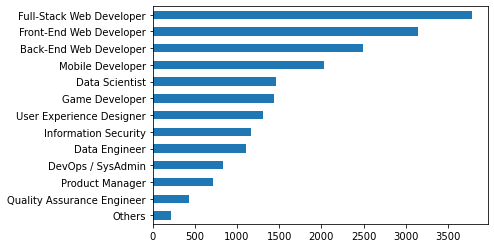

In [19]:
melted_db['value'].value_counts().sort_values().plot.barh()
plt.show()

We see that the most participants are interested in web and mobile development. Exactly what we are selling most.

We can't use our **melted_db** data set for analizing countries, as there can be multiple rows for every respondent if they gave multiple answers about job inerests, so we'll return to the **relevant_data** data set

# Finding the best countries

In [20]:
relevant_data['country'].value_counts().head(10)

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Germany                      114
Brazil                       111
Australia                    102
Ukraine                       79
Russia                        79
Name: country, dtype: int64

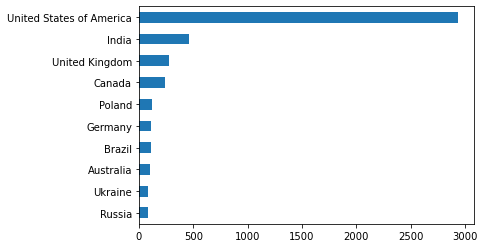

In [21]:
relevant_data['country'].value_counts().sort_values().tail(10).plot.barh()
plt.show()

It seems obvious that USA and India are the biggest markets. But we must figure out the participants' intention to pay for education. Advertising within markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

The **MoneyForLearning** column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.

It also seems like a good idea to narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. Two reasons for this decision are:

* These are the countries having the highest absolute frequencies in our sample, which means we have a decent amount of data for each.
* 
Our courses are written in English, and English is an official language in all these four countries. The more people that know English, the better our chances to target the right people with our ads.

# Taking top 4 countries

In [22]:
countries = ['United States of America', 'India', 'United Kingdom', 'Canada']
relevant_data = relevant_data[relevant_data['country'].isin(countries)]
relevant_data['country'].value_counts()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: country, dtype: int64

# Cleaning "months programming"

In [23]:
print(relevant_data['months_programming'].isnull().sum())
print((relevant_data['months_programming'] == 0).sum())

0
146


In [24]:
relevant_data.loc[(relevant_data['months_programming'] == 0), 'months_programming'] = 1

In [25]:
print(relevant_data['months_programming'].isnull().sum())
print((relevant_data['months_programming'] == 0).sum())

0
0


# Calculating money per month

In [26]:
relevant_data['spent_per_month'] = relevant_data['money_for_learning'] / relevant_data['months_programming']

We'll take only those who already spent some money for learning. But there is a trick:
>### We are suggested by Dataquest to delete only rows with Null values in **'spent_per_month'** to take only participants who spent at least something. 
>
>### It is wrong because '0' values still stays. I'll show the consequences of this below

In [27]:
print(relevant_data['spent_per_month'].isnull().sum())
(relevant_data['spent_per_month'] == 0).sum()

0


1844

In [28]:
relevant_data_without_zeroes = relevant_data[relevant_data['spent_per_month'] != 0]
relevant_data_with_zeroes = relevant_data[relevant_data['spent_per_month'].notnull()]

In [29]:
relevant_data_with_zeroes['country'].value_counts().head()

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Name: country, dtype: int64

In [30]:
relevant_data_without_zeroes['country'].value_counts().head()

United States of America    1619
India                        201
United Kingdom               137
Canada                       114
Name: country, dtype: int64

# Analizing results

In [31]:
relevant_data_with_zeroes.groupby('country')['spent_per_month'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Canada,240.0,113.510961,441.014158,0.0,0.0,0.000000,25.000000,5000.0
India,463.0,135.100982,692.960378,0.0,0.0,0.000000,13.250000,10000.0
United Kingdom,279.0,45.534443,162.311836,0.0,0.0,0.000000,20.416667,1400.0
United States of America,2933.0,227.997996,1940.245614,0.0,0.0,3.333333,50.000000,80000.0


In [32]:
relevant_data_without_zeroes.groupby('country')['spent_per_month'].describe()

,count,mean,std,min,25%,50%,75%,max
country,,,,,,,,
Canada,114.0,238.970444,617.345854,0.416667,8.333333,25.000000,131.250000,5000.0
India,201.0,311.202759,1026.728280,0.138889,5.500000,20.000000,133.333333,10000.0
United Kingdom,137.0,92.730727,222.359671,0.050000,8.333333,20.833333,66.666667,1400.0
United States of America,1619.0,413.043929,2597.175174,0.033333,10.000000,33.333333,166.666667,80000.0


Let's have a look on means in isolation

In [33]:
means_with_zeroes = relevant_data_with_zeroes.groupby('country')['spent_per_month'].mean()
means_without_zeroes = relevant_data_without_zeroes.groupby('country')['spent_per_month'].mean()

pd.DataFrame(data = {'Means_with_zeroes': means_with_zeroes,
                     'Means_without_zeroes': means_without_zeroes})

,Means_with_zeroes,Means_without_zeroes
country,,
Canada,113.510961,238.970444
India,135.100982,311.202759
United Kingdom,45.534443,92.730727
United States of America,227.997996,413.043929


It looks like "0" values that we have left change everything!

Also, we see there are many outliers (look at the huge difference between 75 percentile and maximum) so the **mean** is not too representative in this case.
But surprisingly we are suggested by DataQuest to use it

Let's see how the averages will change if we take the **median** instead

In [34]:
medians_with_zeroes = relevant_data_with_zeroes.groupby('country')['spent_per_month'].median()
medians_without_zeroes = relevant_data_without_zeroes.groupby('country')['spent_per_month'].median()

pd.DataFrame(data = {'Medians_with_zeroes': medians_with_zeroes,
                     'Medians_without_zeroes': medians_without_zeroes})

,Medians_with_zeroes,Medians_without_zeroes
country,,
Canada,0.000000,25.000000
India,0.000000,20.000000
United Kingdom,0.000000,20.833333
United States of America,3.333333,33.333333


And again the presence of **'0'** values changes everything and makes the median unuseful. But when we take a properly cleaned data set, the median becomes quite representative.

At this stage it should be obvious that rows with "zeroes" in **spent_per_month** column must be droped. I will use only properly cleaned data set from now on

# Managing outliers

We may notice the huge difference between 75th percentile and the maximum value when we analized **spent_per_month**. It seems there are some outliers. Let's visualize it and see

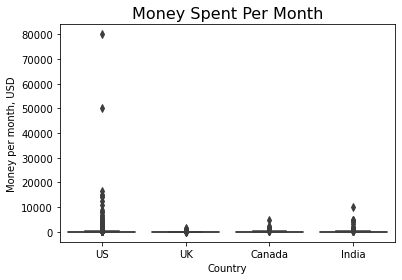

In [35]:
sns.boxplot(x = 'country',
            y = 'spent_per_month', 
            data = relevant_data_without_zeroes)
plt.title('Money Spent Per Month',fontsize = 16)
plt.ylabel('Money per month, USD')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'Canada', 'India'])
plt.show()

We even can't see boxes. Let's try to cut the furthest outliers and take only values less than 20 000

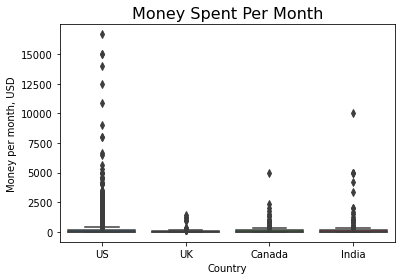

In [36]:
sns.boxplot(x = 'country',
            y = 'spent_per_month', 
            data = relevant_data_without_zeroes[relevant_data_without_zeroes['spent_per_month']<20000])
plt.title('Money Spent Per Month',fontsize = 16)
plt.ylabel('Money per month, USD')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'Canada', 'India'])
plt.show()

Still quite unclear. The number of outliers can tell us that participants could take into account money spent on primary univercity or bootcamps.

Let's try to determine our potential customers as those, who spent between 20 and 200 USD per month and see how it affects on the size of our sample

In [37]:
condition = (relevant_data_without_zeroes['spent_per_month'] > 20) & (relevant_data_without_zeroes['spent_per_month'] < 200)

In [38]:
print(relevant_data_without_zeroes.shape[0])
relevant_data_without_zeroes[condition].shape[0]

2071


774

Now we have only one third af the previous sample, but this is the most likely our audience

# Visualizing money spent per month

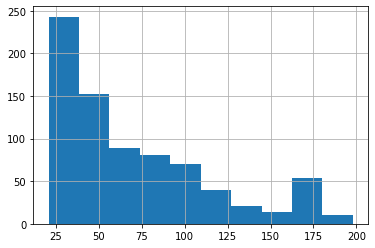

In [39]:
relevant_data_without_zeroes[condition]['spent_per_month'].hist()
plt.show()

As we have an extremely right skewed distribution we may assume that we have saved the most important data when applying our condition.

Let's see how boxplot will work now

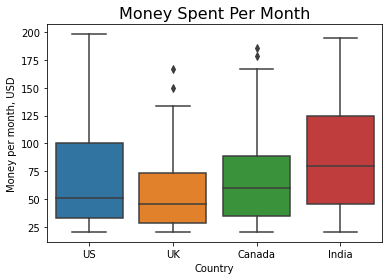

In [40]:
sns.boxplot(x = 'country',
            y = 'spent_per_month', 
            data = relevant_data_without_zeroes[condition])
plt.title('Money Spent Per Month',fontsize = 16)
plt.ylabel('Money per month, USD')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'Canada', 'India'])
plt.show()

Much better now! But before making conclusions let's compare means and medians for each country. Also we must take into account a number of respondents from each country

# Making the result table


In [41]:
medians = relevant_data_without_zeroes[condition].groupby('country')['spent_per_month'].median()
means = relevant_data_without_zeroes[condition].groupby('country')['spent_per_month'].mean()
num_respondents = relevant_data_without_zeroes[condition]['country'].value_counts()
results_df = pd.DataFrame(data = {'Median': medians,
                                  'Mean': means,
                                  'Num_respondents': num_respondents})
results_df

,Median,Mean,Num_respondents
Canada,45.833333,58.502976,40
India,79.916667,88.939039,62
United Kingdom,60.000000,69.128001,55
United States of America,51.111111,68.857456,617


Now we are going to think which measure represents the distribution best. I assume, it is the mean, because we've left only those who spent more than 20 USD and less than 200 per month. So it is more important to take the weight of every value into account, than to avoid outliers.

We'll also round the values of means

In [42]:
results_df.drop(columns = 'Median', inplace = True)
results_df['Mean'] = round((results_df['Mean']),0).astype('int')

In [43]:
results_df.reset_index(inplace=True)
results_df

,index,Mean,Num_respondents
0,Canada,59,40
1,India,89,62
2,United Kingdom,69,55
3,United States of America,69,617


# Visualizing results

Infortunately, **seaborn.relplot** is unavaliable, so we'll make a simple graph using matplotlib

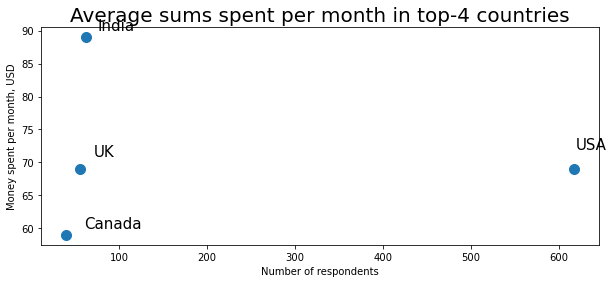

In [44]:
plt.figure(figsize = (10, 4))
plt.title('Average sums spent per month in top-4 countries', fontsize = 20)

plt.scatter(results_df['Num_respondents'],
            results_df['Mean'],
            s=100)
        
plt.text(60, 60, 'Canada', fontsize = 15)
plt.text(71, 71, 'UK', fontsize = 15)
plt.text(75, 90, 'India', fontsize = 15)
plt.text(620, 72, 'USA', fontsize = 15)

plt.ylabel('Money spent per month, USD')
plt.xlabel('Number of respondents')


plt.show()

## Conclusion
To be honest, all our samples do not represent population for every country, because take into account only those who were involved in the survey. But nevertheless we could share some thoughts with the marketing department.

Obviously, the most interesting market for advertizing is USA. As for the second country, we see that number of respondents are almost equal, but in India people on average tend to spend more than in Canada and UK.

So I would recommend to invest in USA and India.

What is much more important is to always bear in mind what lies behind the numbers we're analizing